# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
%pip install citipy




  Using cached citipy-0.0.5.tar.gz (557 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559694 sha256=89893ecc5e8fa77d8b34b3fb22f519753a8ccaa3c169f0b187744309de2e889f
  Stored in directory: c:\users\tscot\appdata\local\pip\cache\wheels\94\17\71\095b7a7837296a76209d20ec21caec0545e96c94fed9872472
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key
print(weather_api_key)
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

6624250625dad8653e36527a53a254ed


### Generate the Cities List by Using the `citipy` Library

In [4]:

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 615
['gubkinskiy', 'barentsburg', 'busselton', 'buchanan', 'bluff', 'halalo', 'ossora', 'vaini', 'punta arenas', 'rikitea', 'belushya guba', 'ponta do sol', 'tondano', 'albany', 'coihaique', 'vostok', 'port elizabeth', 'cidreira', 'ushuaia', 'nabha', 'chinsali', 'kruisfontein', 'mataura', 'gimli', 'teguise', 'casablanca', 'barrow', 'east london', 'leningradskiy', 'atuona', 'naze', 'jamestown', 'kamennogorsk', 'qaanaaq', 'khatanga', 'hasaki', 'aripuana', 'palabuhanratu', 'coronon', 'goleta', 'yellowknife', 'muros', 'tura', 'victoria', 'teahupoo', 'georgetown', 'harrow', 'thanyaburi', 'mount gambier', 'rockford', 'norman wells', 'saint george', 'tongliao', 'kapaa', 'muncar', 'astana', 'cururupu', 'ribeira grande', 'synya', 'saint-philippe', 'san rafael', 'provideniya', 'verkhnevilyuysk', 'srednekolymsk', 'midland', 'louisbourg', 'lephepe', 'zhigansk', 'sentyabrskiy', 'saskylakh', 'araguatins', 'luau', 'granadilla de abona', 'sindand', 'new norfolk', 'broken 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
url =  f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

print (url + "&q=San Francisco")

In [5]:
# Set the API base URL
url =  f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=6624250625dad8653e36527a53a254ed
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gubkinskiy
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | buchanan
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | halalo
City not found. Skipping...
Processing Record 7 of Set 1 | ossora
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | tondano
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | coihaique
Processing Record 16 of Set 1 | vostok
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | cidreira
Processing Record 

Processing Record 30 of Set 4 | kieta
Processing Record 31 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 32 of Set 4 | florianopolis
Processing Record 33 of Set 4 | singkang
Processing Record 34 of Set 4 | kaitangata
Processing Record 35 of Set 4 | airai
Processing Record 36 of Set 4 | one hundred mile house
City not found. Skipping...
Processing Record 37 of Set 4 | ancud
Processing Record 38 of Set 4 | isla mujeres
Processing Record 39 of Set 4 | praia da vitoria
Processing Record 40 of Set 4 | kaifeng
Processing Record 41 of Set 4 | iranshahr
Processing Record 42 of Set 4 | fuerte olimpo
Processing Record 43 of Set 4 | port hardy
Processing Record 44 of Set 4 | sibu
Processing Record 45 of Set 4 | choix
Processing Record 46 of Set 4 | san patricio
Processing Record 47 of Set 4 | marsh harbour
Processing Record 48 of Set 4 | juneau
Processing Record 49 of Set 4 | puerto ayora
Processing Record 0 of Set 5 | tuatapere
Processing Record 1 of Set 5 | lensk
Processing 

Processing Record 17 of Set 8 | viedma
Processing Record 18 of Set 8 | puteyets
Processing Record 19 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 20 of Set 8 | shingu
Processing Record 21 of Set 8 | huarmey
Processing Record 22 of Set 8 | leesburg
Processing Record 23 of Set 8 | alyangula
Processing Record 24 of Set 8 | tiruvottiyur
City not found. Skipping...
Processing Record 25 of Set 8 | fredericksburg
Processing Record 26 of Set 8 | padang
Processing Record 27 of Set 8 | harper
Processing Record 28 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 29 of Set 8 | paita
Processing Record 30 of Set 8 | sataua
City not found. Skipping...
Processing Record 31 of Set 8 | celestun
Processing Record 32 of Set 8 | shieli
Processing Record 33 of Set 8 | longlac
City not found. Skipping...
Processing Record 34 of Set 8 | sonoita
Processing Record 35 of Set 8 | la palma
Processing Record 36 of Set 8 | griffith
Processing Record 37 of Set 8 | patur
Proce

Processing Record 5 of Set 12 | bilma
Processing Record 6 of Set 12 | taicheng
Processing Record 7 of Set 12 | haines junction
Processing Record 8 of Set 12 | mirnyy
Processing Record 9 of Set 12 | quepos
Processing Record 10 of Set 12 | rocha
Processing Record 11 of Set 12 | luwero
Processing Record 12 of Set 12 | brandon
Processing Record 13 of Set 12 | meulaboh
Processing Record 14 of Set 12 | tera
Processing Record 15 of Set 12 | karonga
Processing Record 16 of Set 12 | moron
Processing Record 17 of Set 12 | kodinar
Processing Record 18 of Set 12 | hovd
Processing Record 19 of Set 12 | koygorodok
Processing Record 20 of Set 12 | emerald
Processing Record 21 of Set 12 | flinders
Processing Record 22 of Set 12 | qurbah
City not found. Skipping...
Processing Record 23 of Set 12 | semenivka
Processing Record 24 of Set 12 | ziro
Processing Record 25 of Set 12 | podgorica
Processing Record 26 of Set 12 | la ronge
Processing Record 27 of Set 12 | aginskoye
Processing Record 28 of Set 12 |

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gubkinskiy,64.4340,76.5026,-15.58,95,91,7.90,RU,1675914110
1,busselton,-33.6500,115.3333,27.94,35,0,1.30,AU,1675914114
2,buchanan,5.8808,-10.0467,25.17,87,76,0.78,LR,1675914114
3,bluff,-46.6000,168.3333,13.22,56,77,8.33,NZ,1675914114
4,ossora,59.2353,163.0719,-13.58,89,100,7.02,RU,1675914115


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gubkinskiy,64.4340,76.5026,-15.58,95,91,7.90,RU,1675914110
1,busselton,-33.6500,115.3333,27.94,35,0,1.30,AU,1675914114
2,buchanan,5.8808,-10.0467,25.17,87,76,0.78,LR,1675914114
3,bluff,-46.6000,168.3333,13.22,56,77,8.33,NZ,1675914114
4,ossora,59.2353,163.0719,-13.58,89,100,7.02,RU,1675914115


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

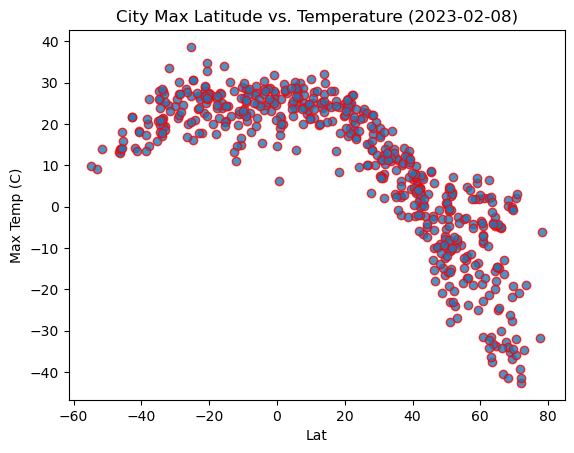

In [10]:
import time
import matplotlib.pyplot as plt


# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Lat")
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

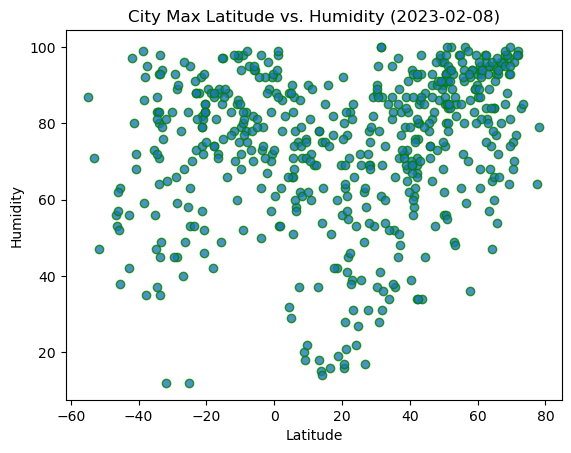

In [11]:
import time
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor= "green",
    linewidths= 1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties

date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

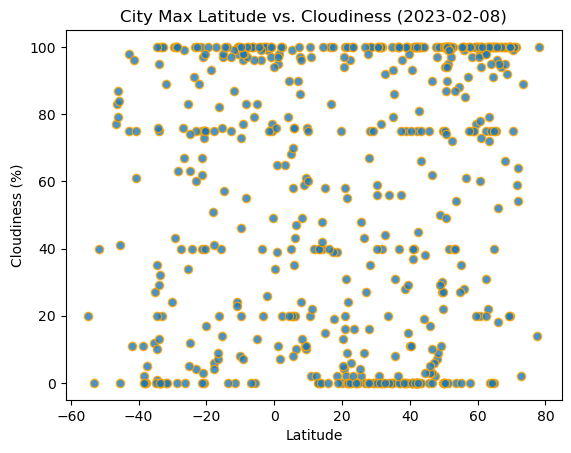

In [12]:
import time
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

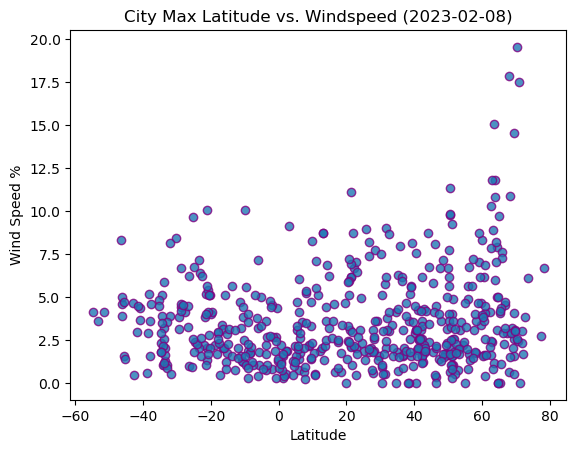

In [13]:
import time
# Build the scatter plots for latitude vs. wind speed

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="purple",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties

date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Windspeed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed %")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
 # Define a function to create Linear Regression plots
 def   plot_linear_regression(x_value, y_value, title, text_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value,y_value)
    plt.plot(x_value, regress_value,"r-")
    plt.annotate(line_eq, text_coord, fontsize = 15, color = "red")
    plt.xlabel("Lat ")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude > 0)
northern_hemi_df =city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gubkinskiy,64.4340,76.5026,-15.58,95,91,7.90,RU,1675914110
2,buchanan,5.8808,-10.0467,25.17,87,76,0.78,LR,1675914114
4,ossora,59.2353,163.0719,-13.58,89,100,7.02,RU,1675914115
8,ponta do sol,32.6667,-17.1000,14.84,74,44,3.04,PT,1675914116
9,tondano,1.3038,124.9112,26.05,53,98,1.57,ID,1675914117


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df =city_data_df[city_data_df["Lat"] <0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,busselton,-33.6500,115.3333,27.94,35,0,1.30,AU,1675914114
3,bluff,-46.6000,168.3333,13.22,56,77,8.33,NZ,1675914114
5,vaini,-21.2000,-175.2000,29.09,79,75,2.06,TO,1675914115
6,punta arenas,-53.1500,-70.9167,9.06,71,0,3.60,CL,1675914010
7,rikitea,-23.1203,-134.9692,26.75,73,4,6.40,PF,1675914116


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7469259044965784


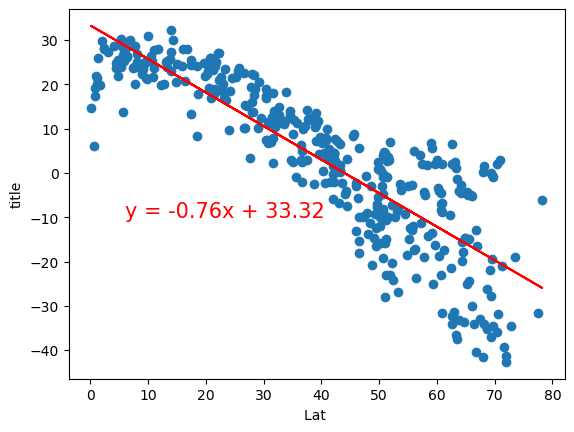

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (6, -10))

The r-value is 0.19305636804181844


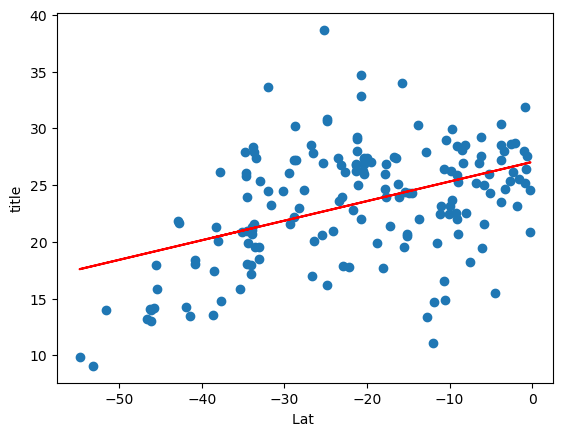

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (-35,5))

**Discussion about the linear relationship: The Northern and Southern hemispheres are inverse related in regards to the linear regression but the closer each hemisphere is to the Equator, the higher the temperature is.  At zero latitude both hemispheres have a close temperature.

### Humidity vs. Latitude Linear Regression Plot

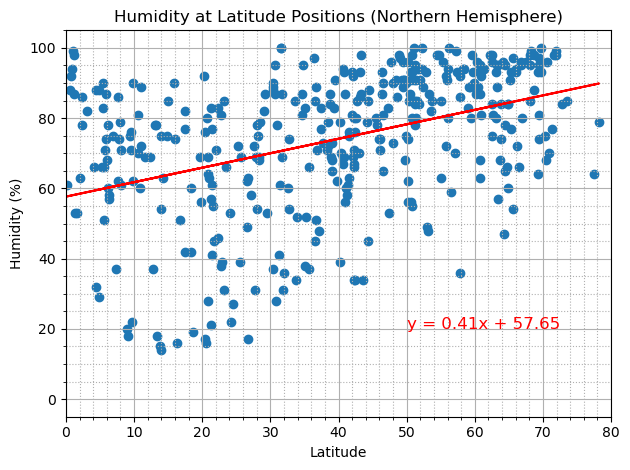

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

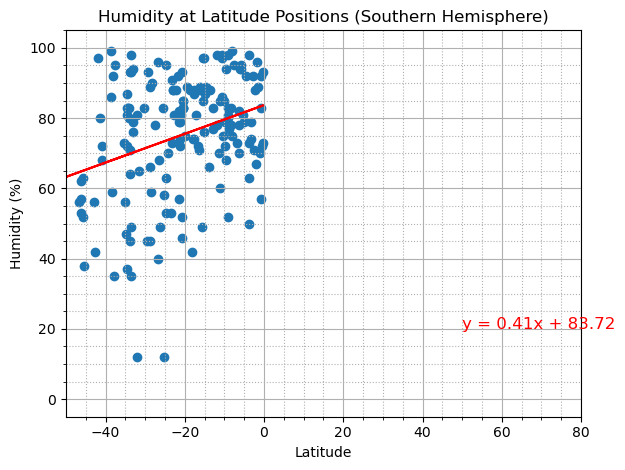

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-5, 105)
plt.xlim(-50, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:**There does not seem to be a very strong correlation between humidity and latitude. However, there does seem to be a slight positive correlation in the Northern Hemisphere and a slight negative correlation in the Southern Hemisphere; meaning in the Northern Hemisphere as you get further away from the equator (latitude 0) humidity increases, and in the Southern Hemisphere it decreases as you get further away from the equator.


### Cloudiness vs. Latitude Linear Regression Plot

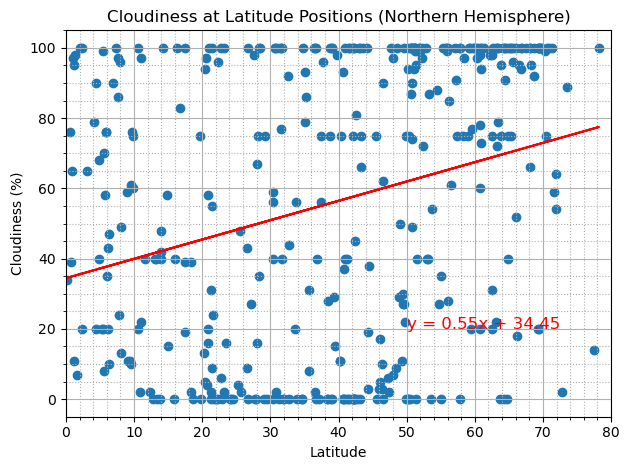

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

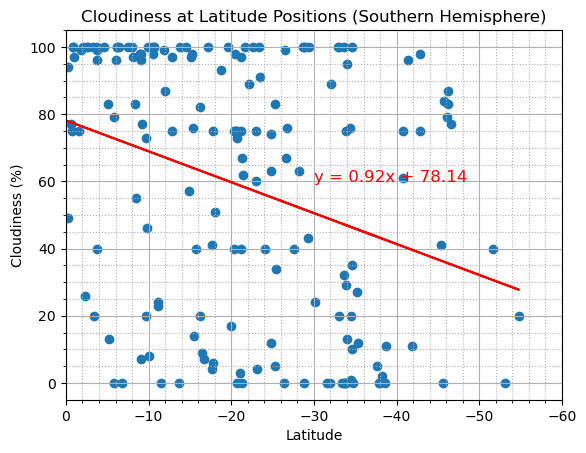

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()

**Discussion about the linear relationship:** There does not seem to be much correlation between cloudiness and latitude when you look at the plots. However, when the linear regression is performed, you can see that there is a slight positive correlation in the Northern Hemisphere but a strong negative correlation in the Southern Hemisphere. In the Southern Hemisphere it shows that the further you are from the equator (latitude 0) the less cloudy it is.

### Wind Speed vs. Latitude Linear Regression Plot

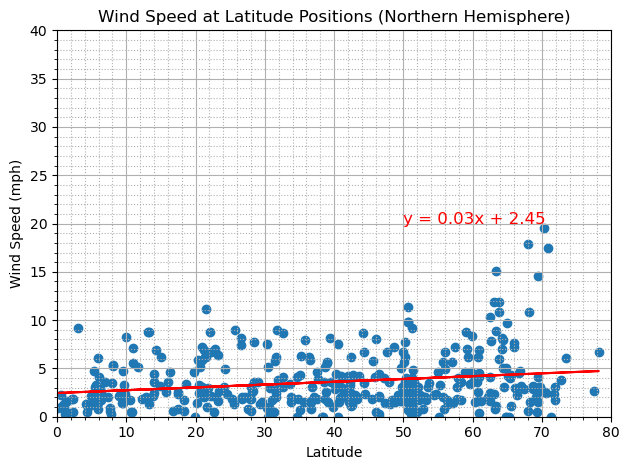

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

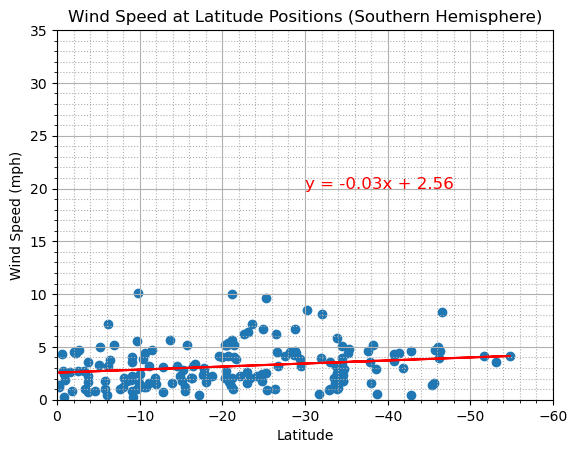

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
There does seem to be a pretty strong correlation between wind sped and latitude when you look at the plots. However, the linear regresion shows a much lower correlation than it appears. There is still a definite correlation in both hemispheres, in that the further you are from the equator (latitude 0) the higher the wind speeds are, but the slope of the regression line is much shallower than I was expecting looking at the plots.